In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from seaborn import load_dataset
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

-  from sklearn.datasets import make_blobs:sentetik veri kümeleri oluşturmaya yönelik birçok araç

### Bölünmüş verilerle K-En Yakın Komşular (KNN) modeli oluşturmak aşağıdaki adımları içerir:

1. Gerekli kütüphaneleri içe aktarın.
2. Veri kümesini yükleyin ve ön işleme tabi tutun.
3. Veri kümesini eğitim ve test kümelerine bölün.
4. Eğitim verilerini kullanarak KNN modelini oluşturun ve eğitin.
5. Test verilerini kullanarak modelin performansını değerlendirin.



In [29]:
df = load_dataset('penguins')
print(df.head())


  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female  


### Penguins veri kümesi açıklama
- species:Penguen türleri
- island:Penguenin verilerinin alındığı ada
- bill-length_mm:Milimetre cinsinden ölçülen penguen gagasının uzunluğu
- bill_depth_mm:Milimetre cinsinden ölçülen penguen gagasının derinliği
- flipper_length_mm:Penguenin yüzgecinin milimetre cinsinden ölçülen uzunluğu
- body_mass_g:Penguenin gram cinsinden kütlesi
- sex:penguenin cinsiyeti

In [30]:
# Veri dataframe ve hedefe bölme
df = df.dropna()
X = df.select_dtypes(include='number')
y = df['species']

In [31]:
#Verileri Eğitim ve Test Veri Kümelerine Bölmek
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 100)
knn_model=KNeighborsClassifier(n_neighbors=5)

In [32]:
clf = KNeighborsClassifier(p=1)
#Model eğitme
clf.fit(X_train, y_train)
#KNN Sınıflandırıcılarına İlişkin Tahminler
predictions = clf.predict(X_test)
knn_model.fit(X_train,y_train)
#tahmin yapma
y_pred=knn_model.predict(X_test)

In [33]:

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 78.57%


In [34]:
# Display the classification report and confusion matrix.

print("Classification Report:")

print(classification_report(y_test, y_pred))

print("Confusion Matrix:")

print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

      Adelie       0.70      0.82      0.76        34
   Chinstrap       0.64      0.41      0.50        17
      Gentoo       0.94      0.94      0.94        33

    accuracy                           0.79        84
   macro avg       0.76      0.72      0.73        84
weighted avg       0.78      0.79      0.78        84

Confusion Matrix:
[[28  4  2]
 [10  7  0]
 [ 2  0 31]]


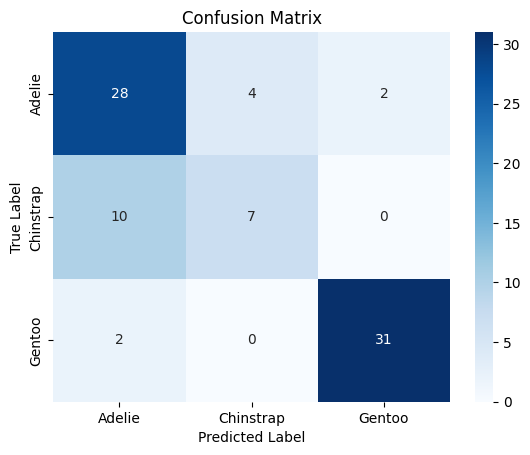

In [35]:
# Visualize Confusion Matrix as a heatmap
conf_matrix = confusion_matrix(y_test, y_pred)
labels = sorted(y_test.unique())  # Assuming y_test and y_pred are Pandas Series
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
